In [2]:
import pandas as pd
import os

file_path = r"C:\Users\Deshan\Documents\IIT LECS\Year 2 Sem 1\DSGP\dataset creation\raw_dataset.csv"

df = pd.read_csv(file_path)

print("Columns in the dataset:")
print(df.columns.tolist())

print(df.info())


Columns in the dataset:
['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER', 'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME', 'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE', 'OBSERVATION COUNT', 'BREEDING CODE', 'BREEDING CATEGORY', 'BEHAVIOR CODE', 'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE', 'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER', 'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES', 'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS', 'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED', 'REVIEWED', 'REASON', 'TRIP COMMENTS', 'SPECIES COMMENTS', 'Unnamed: 49']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 50 columns):
 #   Column     

In [3]:
df_cleaned = df.dropna(axis=1, how='all')

critical_columns = ['LATITUDE', 'LONGITUDE', 'OBSERVATION COUNT', 'OBSERVATION DATE']
df_cleaned = df_cleaned.dropna(subset=critical_columns)

df_cleaned['OBSERVATION DATE'] = pd.to_datetime(df_cleaned['OBSERVATION DATE'], errors='coerce')
df_cleaned['DURATION MINUTES'] = pd.to_numeric(df_cleaned['DURATION MINUTES'], errors='coerce')
df_cleaned['EFFORT DISTANCE KM'] = pd.to_numeric(df_cleaned['EFFORT DISTANCE KM'], errors='coerce')


df_cleaned = df_cleaned[(df_cleaned['DURATION MINUTES'] > 0)
                        & (df_cleaned['EFFORT DISTANCE KM'] > 0)]

print("\nDataset after noise reduction:")
print(df_cleaned.info())



Dataset after noise reduction:
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 483
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   GLOBAL UNIQUE IDENTIFIER   397 non-null    object        
 1   LAST EDITED DATE           397 non-null    object        
 2   TAXONOMIC ORDER            397 non-null    int64         
 3   CATEGORY                   397 non-null    object        
 4   COMMON NAME                397 non-null    object        
 5   SCIENTIFIC NAME            397 non-null    object        
 6   OBSERVATION COUNT          397 non-null    object        
 7   COUNTRY                    397 non-null    object        
 8   COUNTRY CODE               397 non-null    object        
 9   STATE                      397 non-null    object        
 10  STATE CODE                 397 non-null    object        
 11  COUNTY                     397 non-null    o

In [4]:
df_cleaned['OBSERVATION COUNT'] = pd.to_numeric(df_cleaned['OBSERVATION COUNT'], errors='coerce')

#temporal features
df_cleaned['Year'] = df_cleaned['OBSERVATION DATE'].dt.year
df_cleaned['Month'] = df_cleaned['OBSERVATION DATE'].dt.month
df_cleaned['DayOfWeek'] = df_cleaned['OBSERVATION DATE'].dt.dayofweek

def get_season(month):
    if month in [12, 1, 2]:
        return 'Northeast Monsoon'
    elif month in [3, 4]:
        return 'First Inter-monsoon'
    elif month in [5, 6, 7]:
        return 'Southwest Monsoon'
    elif month in [8, 9]:
        return 'Second Inter-monsoon'
    else:
        return 'Unknown'

df_cleaned['Season'] = df_cleaned['Month'].apply(get_season)

#time
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_cleaned['Hour'] = pd.to_datetime(df_cleaned['TIME OBSERVATIONS STARTED'], errors='coerce').dt.hour
df_cleaned['TimeOfDay'] = df_cleaned['Hour'].apply(lambda x: get_time_of_day(x) if not pd.isnull(x) else None)

df_cleaned['CountPerMinute'] = df_cleaned['OBSERVATION COUNT'] / df_cleaned['DURATION MINUTES']
df_cleaned['CountPerKM'] = df_cleaned['OBSERVATION COUNT'] / df_cleaned['EFFORT DISTANCE KM']


C:\Users\Deshan\AppData\Local\Temp\ipykernel_20820\293529170.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Hour'] = pd.to_datetime(df_cleaned['TIME OBSERVATIONS STARTED'], errors='coerce').dt.hour


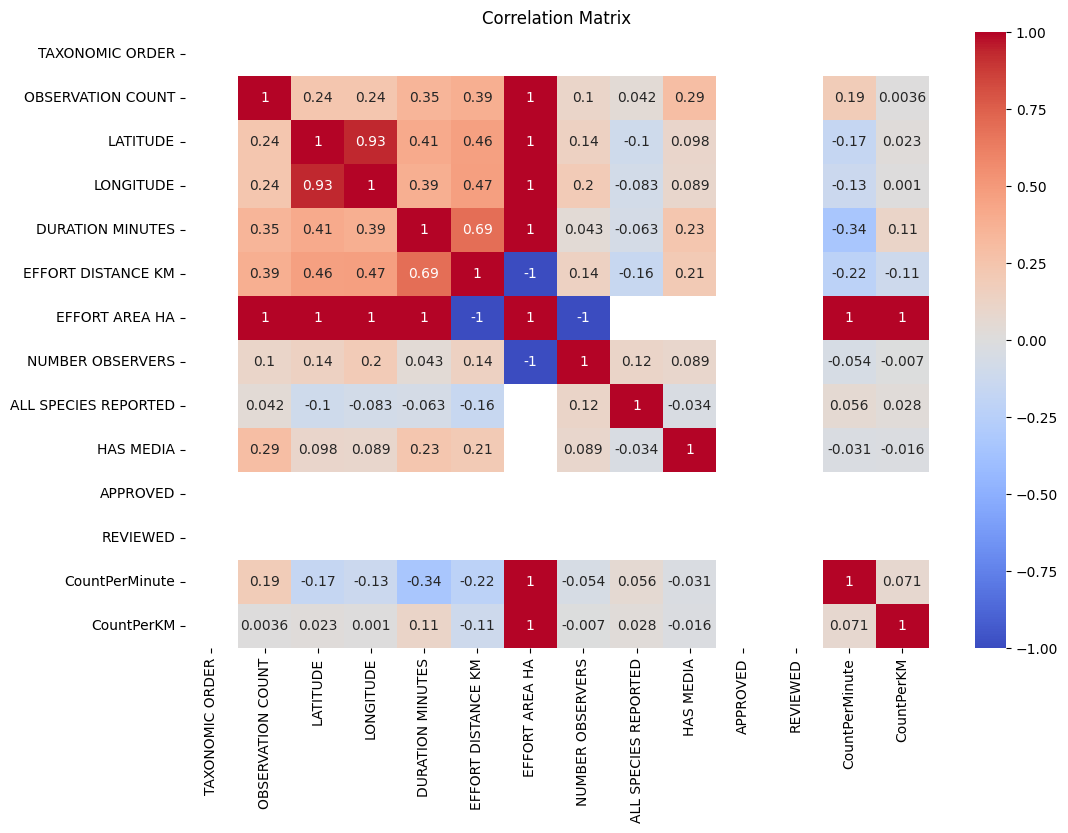

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#only numerical features
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64'])

#correlation matrix
correlation_matrix = numerical_features.corr()

#plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [6]:
# One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Season', 'TimeOfDay'], drop_first=True)

print("\nDataset after one-hot encoding:")
print(df_encoded.head())



Dataset after one-hot encoding:
                          GLOBAL UNIQUE IDENTIFIER  \
0  URN:CornellLabOfOrnithology:EBIRD:OBS1309546250   
1  URN:CornellLabOfOrnithology:EBIRD:OBS1309539456   
2  URN:CornellLabOfOrnithology:EBIRD:OBS1334048727   
3  URN:CornellLabOfOrnithology:EBIRD:OBS1334049465   
4  URN:CornellLabOfOrnithology:EBIRD:OBS1333992668   

             LAST EDITED DATE  TAXONOMIC ORDER CATEGORY        COMMON NAME  \
0  2023-10-23 19:22:46.607435            24523  species  Red-vented Bulbul   
1  2023-10-17 03:09:42.732041            24523  species  Red-vented Bulbul   
2  2023-10-23 19:23:29.964364            24523  species  Red-vented Bulbul   
3  2023-10-22 02:59:01.388532            24523  species  Red-vented Bulbul   
4  2023-10-22 02:59:00.197386            24523  species  Red-vented Bulbul   

    SCIENTIFIC NAME  OBSERVATION COUNT    COUNTRY COUNTRY CODE       STATE  \
0  Pycnonotus cafer                4.0  Sri Lanka           LK  Hambantota   
1  Pycnonotus caf

In [7]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df_encoded['ScaledCountPerMinute'] = scaler.fit_transform(df_encoded[['CountPerMinute']].fillna(0))
df_encoded['ScaledCountPerKM'] = scaler.fit_transform(df_encoded[['CountPerKM']].fillna(0))


In [8]:
import pandas as pd

features = [
    'LATITUDE', 'LONGITUDE', 'ScaledCountPerMinute', 'ScaledCountPerKM',
    'Season_Northeast Monsoon', 'Season_Southwest Monsoon',
    'TimeOfDay_Morning', #TimeOfDay_Afternoon is removed temporarily
    'Month', 'DayOfWeek'
]

# Check if 'TimeOfDay_Afternoon' column exists before trying to access it
if 'TimeOfDay_Afternoon' in df_encoded.columns:
    features.append('TimeOfDay_Afternoon')

X = df_encoded[features]
y = df_encoded['OBSERVATION COUNT']

print(df_encoded.columns)

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'OBSERVATION COUNT',
       'COUNTRY', 'COUNTRY CODE', 'STATE', 'STATE CODE', 'COUNTY',
       'COUNTY CODE', 'IBA CODE', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE',
       'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS',
       'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED',
       'REVIEWED', 'TRIP COMMENTS', 'Year', 'Month', 'DayOfWeek', 'Hour',
       'CountPerMinute', 'CountPerKM', 'Season_Northeast Monsoon',
       'Season_Second Inter-monsoon', 'Season_Southwest Monsoon',
       'Season_Unknown', 'TimeOfDay_Evening', 'TimeOfDay_Morning',
       'ScaledCountPerMinute', 'ScaledCountPerKM'],
      dtype='object')


In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = pd.Series(y_train)

#checking x with y
X_train_cleaned = X_train[~np.isnan(y_train)] 
y_train_cleaned = y_train[~np.isnan(y_train)] 
X_test_cleaned = X_test[~np.isnan(y_test)]
y_test_cleaned = y_test[~np.isnan(y_test)]


#missing target values with the mean
imputer = SimpleImputer(strategy='mean')

y_train_imputed = imputer.fit_transform(y_train_cleaned.values.reshape(-1, 1))
y_train_imputed = y_train_imputed.ravel()

y_test_imputed = imputer.transform(y_test_cleaned.values.reshape(-1, 1))
y_test_imputed = y_test_imputed.ravel()

#randomForestRegressor
model = RandomForestRegressor(random_state=42)


model.fit(X_train_cleaned, y_train_imputed)

y_pred = model.predict(X_test_cleaned)

mse = mean_squared_error(y_test_imputed, y_pred)
r2 = r2_score(y_test_imputed, y_pred)


print(f"Preliminary Model Performance (Before Hyperparameter Tuning):")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Display the RandomForestRegressor model visualization
model

Preliminary Model Performance (Before Hyperparameter Tuning):
Mean Squared Error: 17.655808196721313
R² Score: 0.7723445596052421


RandomForestRegressor(random_state=42)

In [10]:
import pandas as pd
import os

output_path = r"C:\Users\Deshan\Documents\IIT LECS\Year 2 Sem 1\DSGP\dataset creation\final_updated_dataset.csv"

if 'df_encoded' in globals():
    features = [
        'LATITUDE',
        'LONGITUDE',
        'ScaledCountPerMinute',
        'ScaledCountPerKM',
        'Season_Northeast Monsoon', 
        'Season_Southwest Monsoon',
        'TimeOfDay_Morning',
        'Month', 
        'DayOfWeek', 
        'OBSERVATION COUNT'
    ]

    if 'TimeOfDay_Afternoon' in df_encoded.columns:
        features.append('TimeOfDay_Afternoon')

    #new data frame
    df_selected = df_encoded[features]

    df_selected.to_csv(output_path, index=False)
    print(f"Feature-engineered dataset with selected fields saved successfully at: {output_path}")



Feature-engineered dataset with selected fields saved successfully at: C:\Users\Deshan\Documents\IIT LECS\Year 2 Sem 1\DSGP\dataset creation\final_updated_dataset.csv
